---
# **Table of Contents**
---

1. [**Problem Statement**](#Section1)<br>
2. [**Installing & Importing Libraries**](#Section2)<br>
3. [**Data Acquisition & Description**](#Section3)<br>
4. [**Data Pre Processing**](#Section4)<br>
5. [**Exploratory Data Analysis**](#Section5)<br>
6. [**Logistic Regression Model**](#Section6)<br>
7. [**Decission Tree Model**](#Section7)<br>
8. [**Model Evaluation**](#Section8)<br>
    - 8.1. [**Proposal to Management**](#Section801)



---
<a name = Section1></a>
# **1. Problem Statement**
---
A large company named XYZ, employs, at any given point of time, around 4000 employees. However, every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. The management believes that this level of attrition (employees leaving, either on their own or because they got fired) is bad for the company, because of the following reasons -

The former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners
A sizeable department has to be maintained, for the purposes of recruiting new talent
More often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company
Hence, the management has contracted an HR analytics firm to understand what factors they should focus on, in order to curb attrition. In other words, they want to know what changes they should make to their workplace, in order to get most of their employees to stay. Also, they want to know which of these variables is most important and needs to be addressed right away.


Goal of the case study
You are required to model the probability of attrition using a logistic regression. The results thus obtained will be used by the management to understand what changes they should make to their workplace, in order to get most of their employees to stay.

[![](https://www.techfunnel.com/wp-content/uploads/2020/04/employee-attrition.jpg)](https://www.techfunnel.com/wp-content/uploads/2020/04/employee-attrition.jpg)


---
<a id = Section2></a>
# **2. Installing & Importing Libraries**
---

- This section is emphasised on installing and importing the necessary libraries that will be required.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn import metrics
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np
#-------------------------------------------------------------------------------------------------------------------------------
# allow plots to appear directly in the notebook
%matplotlib inline

plt.rcParams['figure.figsize'] = 12, 7
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
#-------------------------------------------------------------------------------------------------------------------------------
from timeit import default_timer as timer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, \
roc_curve, auc, recall_score

from sklearn.feature_selection import RFE
import statsmodels.api as sm

---
<a name = Section3></a>
# **3. Data Acquisition & Description**
---

<b>Datasets</b>

   There are 3 data files that I will be using for this case study in total.  
  
    
<font color=orange><b>1. general_data.csv</b>
    
  - <b>Age:</b> Age of the employee
  - <b>Attrition:</b> Whether the employee has left the organisation
  - <b>BusinessTravel:</b> How frequent the employee travelled for business in the last year
  - <b>Department:</b> Employee's department 
  - <b>DistanceFromHome:</b> Distance between Office and Employee's home (in km)
  - <b>Education:</b> Employee's level of education (1: 'Below College' , 2: 'College' , 3: 'Bachelor's Degree' , 4 : 'Masters Degree' , 5. 'Doctorate')
  - <b>EducationField:</b> Employee's field of education
  - <b>EmployeeCount:</b> Employee count
  - <b>EmployeeID:</b> Unique Employee ID
  - <b>Gender:</b> Employee's gender
  - <b>JobLevel:</b> Employee's job level on a scale of 1 to 5
  - <b>JobRole:</b> Employee's role title
  - <b>MaritalStatus:</b> Employee's marital status
  - <b>MonthlyIncome:</b> Employee's monthly income (in Rupees per month)
  - <b>NumCompaniesWorked:</b> Total number of companies the employee has worked for
  - <b>Over18:</b> Whether the employee is above 18 years of age
  - <b>PercentSalaryHike:</b> Employee's salary hike last year (in percentage points)
  - <b>StandardHours:</b> Employee's standard working hours (duration)
  - <b>StockOptionLevel:</b> Employee's stock option level
  - <b>TotalWorkingYears:</b> Employee's total number of working years (entire life)
  - <b>TrainingTimesLastYear:</b> Number of times employee attended training last year
  - <b>YearsAtCompany:</b> Employee's total number of working years (in the company)
  - <b>YearsSinceLastPromotion:</b> Employee's number of years since last promotion
  - <b>YearsWithCurrManager:</b> Employee's number of years working under current manager


<b>2. employee_survey_data.csv</b>
 
- <b>EmployeeID:</b> Unique Employee ID
- <b>EnvironmentSatisfaction:</b> Employee's Work Environment Satisfaction Level (1: 'Low' , 2: 'Medium' , 3: 'High' , 4 : 'Very High')
- <b>JobSatisfaction:</b> Employee's Job Satisfaction Level (1: 'Low' , 2: 'Medium' , 3: 'High' , 4 : 'Very High') 
- <b>WorkLifeBalance:</b> Employee's Work Life Balance Rating Level (1: 'Low' , 2: 'Medium' , 3: 'High' , 4 : 'Very High') 


<b>3. manager_survey_data.csv</b>

- <b>EmployeeID:</b> Unique Employee ID
- <b>JobInvolvement:</b> Employee's Job Involvement Level (1: 'Low' , 2: 'Medium' , 3: 'High' , 4 : 'Very High')  
- <b>PerformanceRating:</b> Employee's performance rating last year
  
  

In [2]:
empdf = pd.read_csv('https://raw.githubusercontent.com/Harsha92/Machine-Learning-Using-Python/main/Logistic%20Regression/Employee%20Attrition%20Analysis/data/general_data.csv ', dtype={'EmployeeID': object})
empsurvey = pd.read_csv('https://raw.githubusercontent.com/Harsha92/Machine-Learning-Using-Python/main/Logistic%20Regression/Employee%20Attrition%20Analysis/data/employee_survey_data.csv ', dtype={'EmployeeID': object})
mgrsurvey = pd.read_csv('https://raw.githubusercontent.com/Harsha92/Machine-Learning-Using-Python/main/Logistic%20Regression/Employee%20Attrition%20Analysis/data/manager_survey_data.csv ', dtype={'EmployeeID': object})


In [3]:
empdf.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [4]:
empdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   object 
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [5]:
empsurvey.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [6]:
empsurvey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   object 
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), object(1)
memory usage: 137.9+ KB


In [7]:
mgrsurvey.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [8]:
mgrsurvey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   EmployeeID         4410 non-null   object
 1   JobInvolvement     4410 non-null   int64 
 2   PerformanceRating  4410 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 103.5+ KB


---
<a name = Section4></a>
# **4. Data Pre Processing**
---

### <b> Merging the 3 dataframes into 1 dataframe based on EmployeeID key</b>

In [9]:
df = pd.merge(pd.merge(empdf, empsurvey, on = 'EmployeeID'), mgrsurvey, on = 'EmployeeID')

In [10]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   object 
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

### <b> Checking the merged dataframe for data attributes and completeness</b>

In [12]:
df.shape

(4410, 29)

In [13]:
profile = df.profile_report(title="Employee Attrition Data Profiling before Data Preprocessing", progress_bar=False, minimal=True)
profile.to_file(output_file="employee_attrition_data_before_preprocessing.html")

**Observations from Pandas Profiling before Data Processing** <br><br>
__Dataset info__:
- Number of variables: 29
- Number of observations: 4410
- Missing cells: 28

<br>

- **Age** column is normally distributed
- **Rate of attrition** is **16%** as per the given data and it can be an imbalanced dataset and we need to use F1 score metric to get appropriate model performance
- **EmployeeCount**, **Over18**, **StandardHours** column has unique value and we can drop this column as it will not help in predicting attrition rate
- **MonthlyIncome is right skewed with a skewness of 1.36**
- **NumCompaniesWorked**, **TotalWorkingYears**, **EnvironmentSatisfaction**, **JobSatisfaction**, **WorkLifeBalance** are having missing data and we will be replacing these missing values with **median** of these columns

In [14]:
nullcount = df.isnull().sum()
nullcheck = nullcount[nullcount >0]

print('These are the columns that contain null values: ' + '\n')
if nullcheck.empty == False:
    print(nullcheck)
else:
    print('*No more columns with null values*')

These are the columns that contain null values: 

NumCompaniesWorked         19
TotalWorkingYears           9
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64


<b>Key Observation:</b> There are some columns with blank/missing data and will require further pre-processing.

<b>Fill all null values with median of the column. I chose median instead of mean because most of these identified columns are ordinal data with categorical underlyings. Using mean may introduce decimal values which may not make sense to these columns.
    </b>

In [15]:
df.fillna(df.median(), inplace=True)

<b>Check if there are still any null values
    </b>

In [16]:
nullcount = df.isnull().sum()
nullcheck = nullcount[nullcount >0]

print('These are the columns that contain null values: ' + '\n')
if nullcheck.empty == False:
    print(nullcheck)
else:
    print('*No more columns with null values*')

These are the columns that contain null values: 

*No more columns with null values*


<b>Check if there are any columns with just 1 unique value (not useful)
    </b>

In [17]:
uniquecount = df.nunique()
uniquecheck = uniquecount[uniquecount == 1]

print('These are the columns with just 1 unique value: ' + '\n')
print(uniquecheck)

These are the columns with just 1 unique value: 

EmployeeCount    1
Over18           1
StandardHours    1
dtype: int64


<b>Remove columns identified above (i.e. with just 1 unique value)
    </b>

In [18]:
df = df.drop(columns = ['EmployeeCount', 'Over18','StandardHours','EmployeeID'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   Gender                   4410 non-null   object 
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   object 
 10  MaritalStatus            4410 non-null   object 
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4410 non-null   float64
 13  PercentSalaryHike        4410 non-null   int64  
 14  StockOptionLevel        

<b>Feature Engineering: Deriving new features relating to Employee Survey Scores and Manager Survey Scores
    </b>
    

In [20]:
df['AvgEmpScore'] = round(df[['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']].mean(axis=1),1)
df['AvgMgrScore'] = round(df[['JobInvolvement', 'PerformanceRating']].mean(axis=1),1)
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,AvgEmpScore,AvgMgrScore
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,1,0,0,3.0,4.0,2.0,3,3,3.0,3.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,5,1,4,3.0,2.0,4.0,2,4,3.0,3.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,5,0,3,2.0,2.0,1.0,3,3,1.7,3.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,8,7,5,4.0,4.0,3.0,2,3,3.7,2.5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,6,0,4,4.0,1.0,3.0,3,3,2.7,3.0


---
<a name = Section5></a>
# 5. Exploratory Data Analysis
---

### <b>5.1 Visualising the distribution of key categorical data</b>

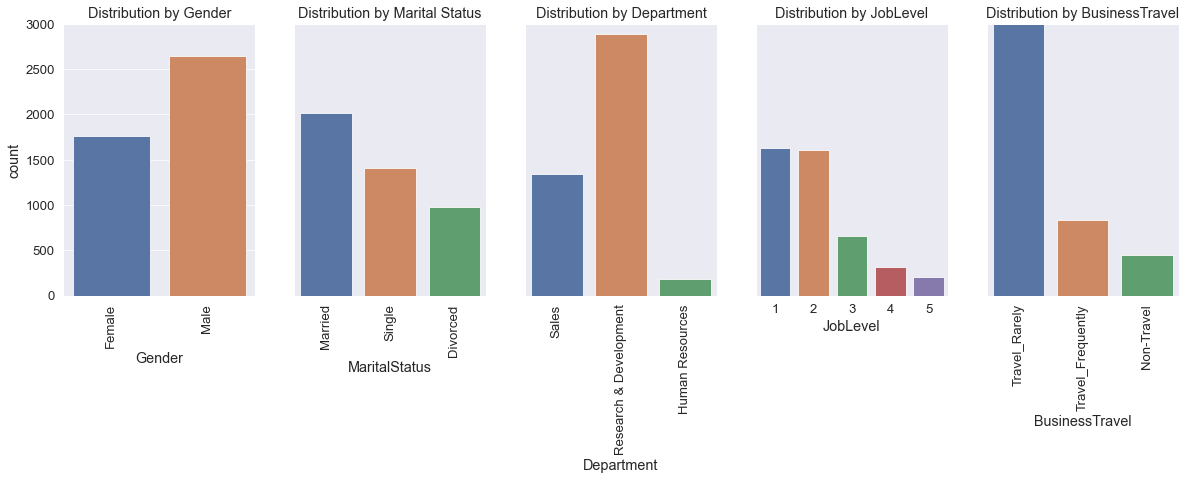

In [21]:
sns.set(context="paper", font_scale=1.5)
plt.figure(figsize=(20,5))

plt.subplot(1,5,1)
sns.countplot(df['Gender'])
plt.xticks(rotation=90)
plt.ylim((0,3000))
plt.title('Distribution by Gender')

plt.subplot(1,5,2)
sns.countplot(df['MaritalStatus'])
plt.xticks(rotation=90)
plt.yticks([])
plt.ylim((0,3000))
plt.ylabel('')
plt.title('Distribution by Marital Status')

plt.subplot(1,5,3)
sns.countplot(df['Department'])
plt.xticks(rotation=90)
plt.yticks([])
plt.ylim((0,3000))
plt.ylabel('')
plt.title('Distribution by Department')

plt.subplot(1,5,4)
sns.countplot(df['JobLevel'])
plt.xticks(rotation=0)
plt.yticks([])
plt.ylim((0,3000))
plt.ylabel('')
plt.title('Distribution by JobLevel')

plt.subplot(1,5,5)
sns.countplot(df['BusinessTravel'])
plt.xticks(rotation=90)
plt.yticks([])
plt.ylim((0,3000))
plt.ylabel('')
plt.title('Distribution by BusinessTravel')

plt.show()

  <b>Key Observations:</b> 
  
 
  a. There are more Male than Female employees.
  
  b. There are more Married employees than Single or Divorced employees.
  
  c. Most of the employees are in Research and Development Department. 
  
  d. Details of the Job Level are not given, but based on data inspection, it is probable that JobLevel increases with seniority (i.e. 5 being the most senior) assuming normal organisational hierarchy.
  
  e. Most of the employees do low frequncy business travels. Only a small proportion of employees do no travel for business at all.

### <b>5.2 Visualising the distribution of key numerical data and its impact on Attrition</b>

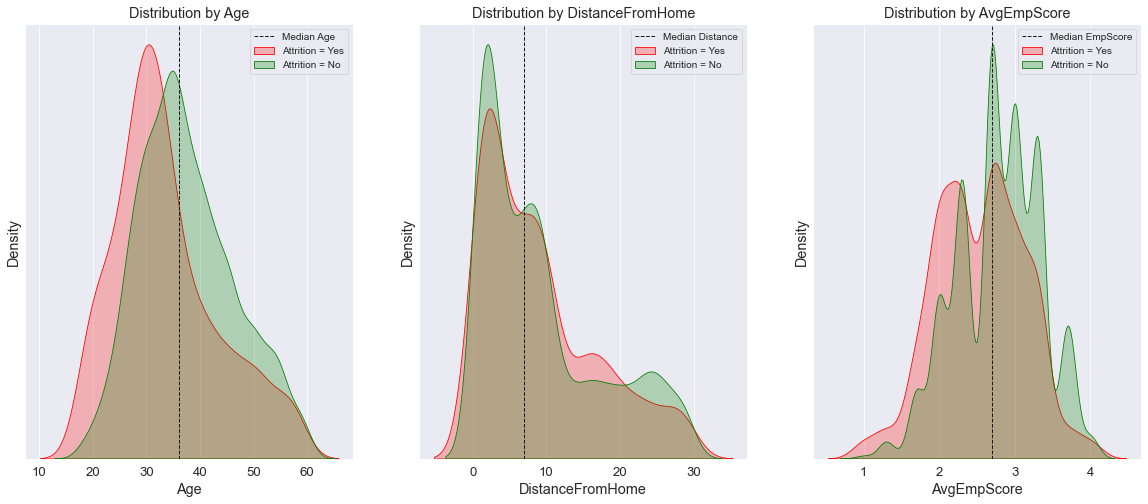

In [22]:
sns.set(context="paper", font_scale=1.5)
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
sns.kdeplot(data= df['Age'][df.Attrition == 'Yes'], color='red', shade=True, legend=False)
sns.kdeplot(data= df['Age'][df.Attrition == 'No'], color='green', shade=True, legend=False)
plt.axvline(df['Age'].median(), color='k', linestyle='dashed', linewidth=1)
plt.legend(['Median Age', 'Attrition = Yes' , 'Attrition = No'],prop={'size': 10})
plt.yticks([])
plt.title('Distribution by Age')

plt.subplot(1,3,2)
sns.kdeplot(data= df['DistanceFromHome'][df.Attrition == 'Yes'], color='red', shade=True)
sns.kdeplot(data= df['DistanceFromHome'][df.Attrition == 'No'], color='green', shade=True)
plt.axvline(df['DistanceFromHome'].median(), color='k', linestyle='dashed', linewidth=1)
plt.legend(['Median Distance', 'Attrition = Yes' , 'Attrition = No'],prop={'size': 10})
plt.yticks([])
plt.title('Distribution by DistanceFromHome')

plt.subplot(1,3,3)
sns.kdeplot(data= df['AvgEmpScore'][df.Attrition == 'Yes'], color='red', shade=True)
sns.kdeplot(data= df['AvgEmpScore'][df.Attrition == 'No'], color='green', shade=True)
plt.axvline(df['AvgEmpScore'].median(), color='k', linestyle='dashed', linewidth=1)
plt.legend(['Median EmpScore', 'Attrition = Yes' , 'Attrition = No'],prop={'size': 10})
plt.yticks([])
plt.title('Distribution by AvgEmpScore')


plt.show()

  <b>Key Observations of Charts Above:</b> 
  
  a. Median Age of employee is 36 years old. Younger employees seem to have a higher risk of attrition.
  
  b. Median Distance from office is 7 km. Employees living further from office seem to have a higher risk of attrition.
  
  c. Median AvgEmpScore is about 2.7. Employees who scored the Employee Survey with lower scores seem to have higher risk of attrition.

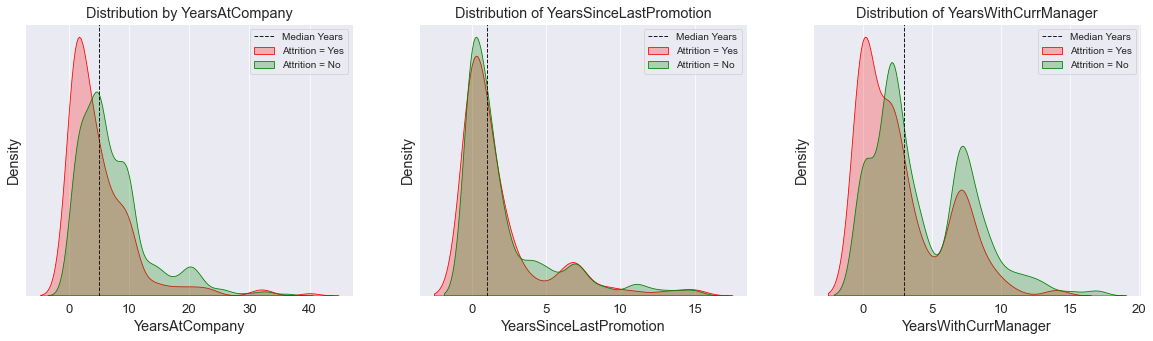

In [23]:
sns.set(context="paper", font_scale=1.5)
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.kdeplot(data= df['YearsAtCompany'][df.Attrition == 'Yes'], color='red', shade=True)
sns.kdeplot(data= df['YearsAtCompany'][df.Attrition == 'No'], color='green', shade=True)
plt.axvline(df['YearsAtCompany'].median(), color='k', linestyle='dashed', linewidth=1)
plt.legend(['Median Years', 'Attrition = Yes' , 'Attrition = No'],prop={'size': 10})
plt.yticks([])
plt.title('Distribution by YearsAtCompany')

plt.subplot(1,3,2)
sns.kdeplot(data= df['YearsSinceLastPromotion'][df.Attrition == 'Yes'], color='red', shade=True)
sns.kdeplot(data= df['YearsSinceLastPromotion'][df.Attrition == 'No'], color='green', shade=True)
plt.axvline(df['YearsSinceLastPromotion'].median(), color='k', linestyle='dashed', linewidth=1)
plt.legend(['Median Years', 'Attrition = Yes' , 'Attrition = No'],prop={'size': 10})
plt.yticks([])
plt.title('Distribution of YearsSinceLastPromotion')

plt.subplot(1,3,3)
sns.kdeplot(data= df['YearsWithCurrManager'][df.Attrition == 'Yes'], color='red', shade=True)
sns.kdeplot(data= df['YearsWithCurrManager'][df.Attrition == 'No'], color='green', shade=True)
plt.axvline(df['YearsWithCurrManager'].median(), color='k', linestyle='dashed', linewidth=1)
plt.legend(['Median Years', 'Attrition = Yes' , 'Attrition = No' ],prop={'size': 10})
plt.yticks([])
plt.title('Distribution of YearsWithCurrManager')

plt.show()

  <b>Key Observations of Charts Above:</b> 
  
 
  a. Median YearsAtCompany is 5 years. Newer employees (who have spent lesser years in company) seem to have a higher risk of attrition.
  
  b. Median YearsSinceLastPromotion is 1 year. Employees who were recently promoted seem to have higher risk of attrition.
  
  c. Median YearsWithCurrManager is 3 years. Employees who have spent lesser years with current manager seem to have higher risk of attrition.

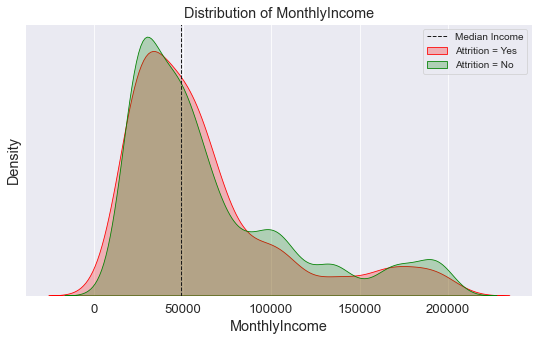

In [24]:
sns.set(context="paper", font_scale=1.5)
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.kdeplot(data= df['MonthlyIncome'][df.Attrition == 'Yes'], color='red', shade=True)
sns.kdeplot(data= df['MonthlyIncome'][df.Attrition == 'No'], color='green', shade=True)
plt.axvline(df['MonthlyIncome'].median(), color='k', linestyle='dashed', linewidth=1)
plt.legend(['Median Income', 'Attrition = Yes' , 'Attrition = No'],prop={'size': 10})
plt.yticks([])
plt.title('Distribution of MonthlyIncome')
plt.show()

  <b>Key Observation of Chart Above:</b> 
  
 
Median MonthlyIncome is around 50,000 Rupees. Employees who are paid lower than 80,000 Rupees seem to have a slightly higher risk of attrition. However, the observed difference is not as visually significant compared to features explored earlier.

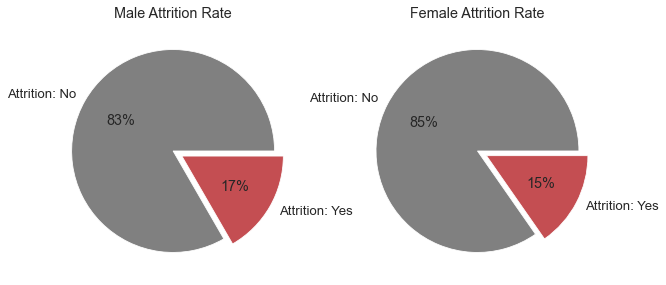

In [25]:
sns.set(context="paper", font_scale=1.5)

Male = df[df['Gender'] == 'Male'].groupby(['Attrition']).size()
Female = df[df['Gender'] == 'Female'].groupby(['Attrition']).size()

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))

ax1.pie(Male, autopct = '%.0f%%', radius= 1, startangle = 0,labels = ('Attrition: No','Attrition: Yes'),labeldistance = 1.1,colors = ('gray','r'),explode=(0,0.1))
ax1.set_title('Male Attrition Rate')


ax2.pie(Female, autopct = '%.0f%%', radius= 1, startangle = 0, labels =('Attrition: No','Attrition: Yes'), labeldistance = 1.1,colors = ('gray','r'),explode=(0,0.1))
ax2.set_title('Female Attrition Rate')

plt.show()

  <b>Key Observation of Charts Above:</b> 
  
 
Male employees have marginally higher attrition rate compared to Female employees.
  

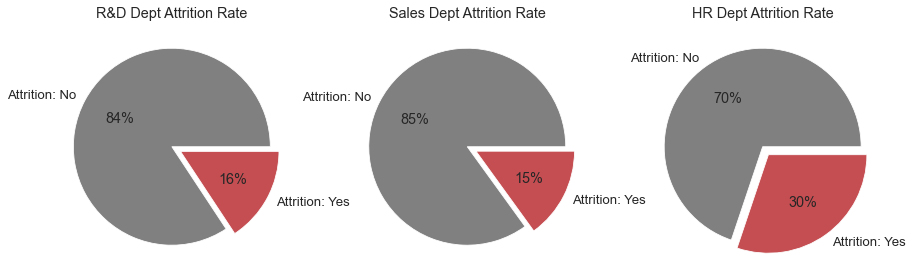

In [26]:
sns.set(context="paper", font_scale=1.5)

RD = df[df['Department'] == 'Research & Development'].groupby(['Attrition']).size()
Sales = df[df['Department'] == 'Sales'].groupby(['Attrition']).size()
HR = df[df['Department'] == 'Human Resources'].groupby(['Attrition']).size()

fig, (ax1,ax2, ax3) = plt.subplots(1,3,figsize=(15,15))

ax1.pie(RD, autopct = '%.0f%%', radius= 1, startangle = 0,labels = ('Attrition: No','Attrition: Yes'),labeldistance = 1.1,colors = ('gray','r'), explode=(0,0.1))
ax1.set_title('R&D Dept Attrition Rate')

ax2.pie(Sales, autopct = '%.0f%%', radius= 1, startangle = 0, labels =('Attrition: No','Attrition: Yes'), labeldistance = 1.1,colors = ('gray','r'), explode=(0,0.1))
ax2.set_title('Sales Dept Attrition Rate')

ax3.pie(HR, autopct = '%.0f%%', radius= 1, startangle = 0, labels =('Attrition: No','Attrition: Yes'), labeldistance = 1.1,colors = ('gray','r'), explode=(0,0.1))
ax3.set_title('HR Dept Attrition Rate')

plt.show()

  <b>Key Observation of Charts Above:</b> 
  
 
  Attrition rate of HR Department is twice that of Sales or R&D Department.
  

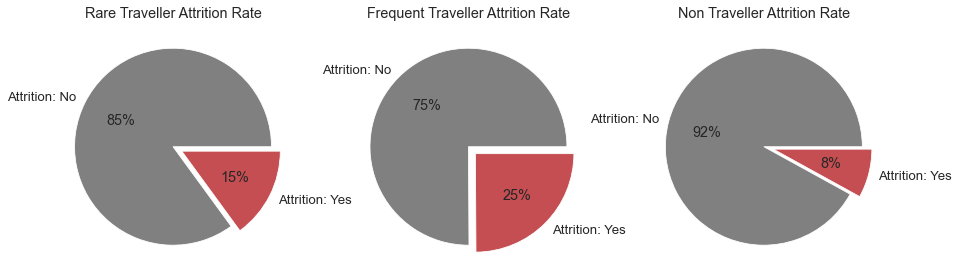

In [27]:
sns.set(context="paper", font_scale=1.5)

Rare = df[df['BusinessTravel'] == 'Travel_Rarely'].groupby(['Attrition']).size()
Freq = df[df['BusinessTravel'] == 'Travel_Frequently'].groupby(['Attrition']).size()
Non = df[df['BusinessTravel'] == 'Non-Travel'].groupby(['Attrition']).size()

fig, (ax1,ax2, ax3) = plt.subplots(1,3,figsize=(15,15))

ax1.pie(Rare, autopct = '%.0f%%', radius= 1, startangle = 0,labels = ('Attrition: No','Attrition: Yes'),labeldistance = 1.1,colors = ('gray','r'), explode=(0,0.1))
ax1.set_title('Rare Traveller Attrition Rate')

ax2.pie(Freq, autopct = '%.0f%%', radius= 1, startangle = 0, labels = ('Attrition: No','Attrition: Yes'), labeldistance = 1.1,colors = ('gray','r'), explode=(0,0.1))
ax2.set_title('Frequent Traveller Attrition Rate')

ax3.pie(Non, autopct = '%.0f%%', radius= 1, startangle = 0, labels =('Attrition: No','Attrition: Yes'), labeldistance = 1.1,colors = ('gray','r'), explode=(0,0.1))
ax3.set_title('Non Traveller Attrition Rate')

plt.show()

  <b>Key Observation of Charts Above:</b> 
  
 
  Attrition rate of employees who are Frequent Business Travellers is significantly higher than employees who are Rare or Non Business Travellers.
  


- Preparing DataFrame for Machine Learning

In [28]:
df_copy = df.copy()

In [29]:
print(df is df_copy)

False


<b>Identifying all features that are categorical in nature
    </b>

In [30]:
catcoldf = df.select_dtypes(include='object')
catcolname = list(catcoldf.columns.values)
catcolname

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus']

<b>Transforming the categorical features into numerical features using get_dummies function in Pandas in order for these features to be used by machine learning algorithms
    </b>
    

In [31]:
df = pd.get_dummies(df, columns = catcolname)
df.head()

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,51,6,2,1,131160,1.0,11,0,1.0,6,...,0,0,0,0,0,0,0,0,1,0
1,31,10,1,1,41890,0.0,23,1,6.0,3,...,0,0,0,0,1,0,0,0,0,1
2,32,17,4,4,193280,1.0,15,3,5.0,2,...,0,0,0,0,0,1,0,0,1,0
3,38,2,5,3,83210,3.0,11,3,13.0,5,...,0,0,0,0,0,0,0,0,1,0
4,32,10,1,1,23420,4.0,12,2,9.0,2,...,0,0,0,0,0,1,0,0,0,1


<b>Plotting a Correlation Matrix to identify feature-pairs with high correlation with each other
    </b>

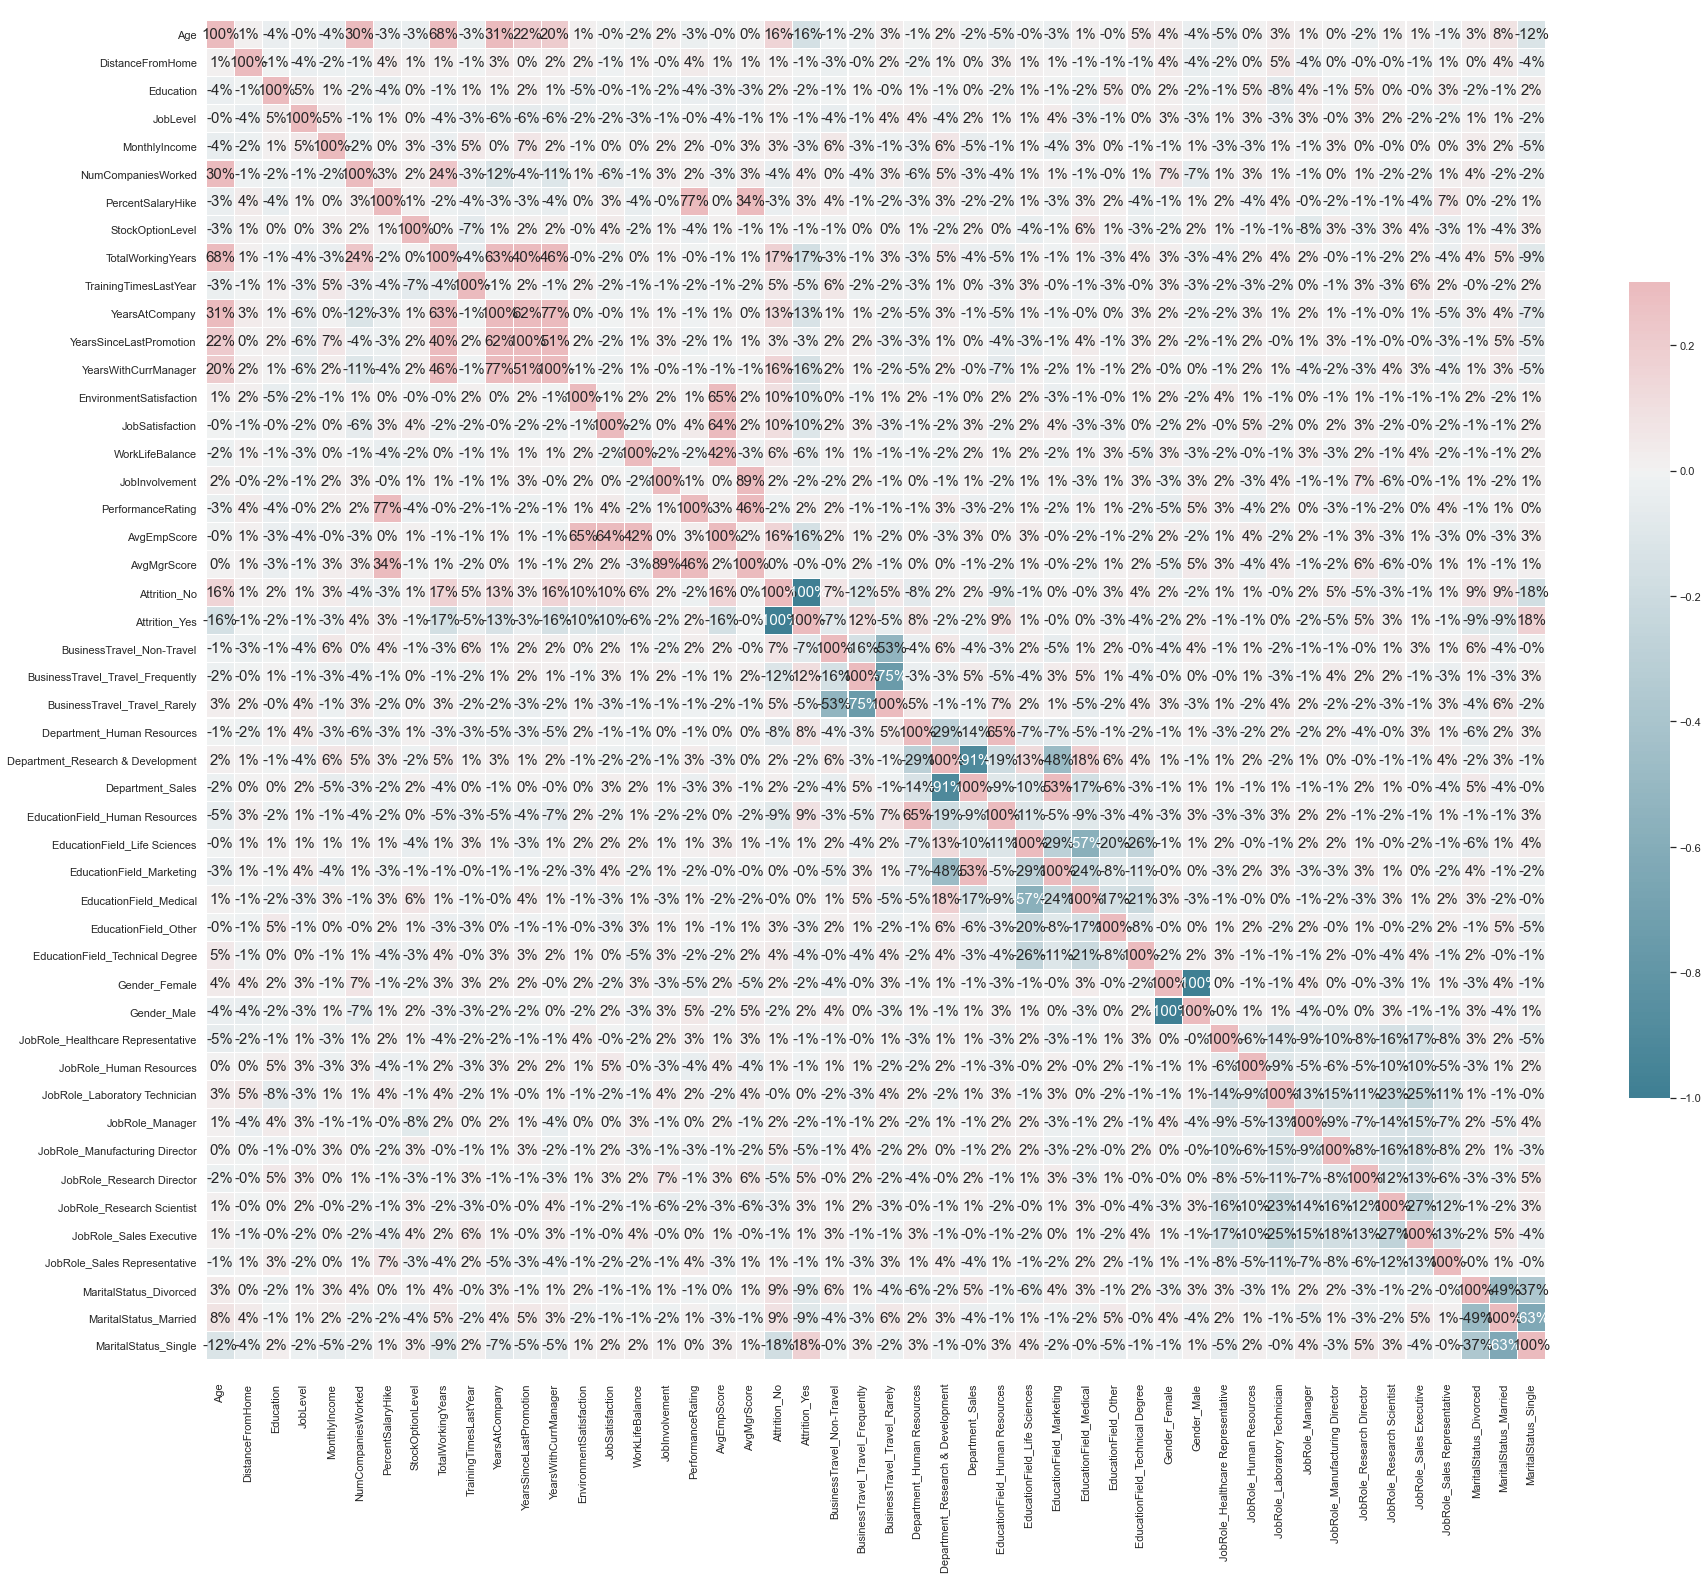

In [32]:
sns.set(style="white")
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(30, 30))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
cm = sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,annot=True, fmt=".0%", square=True, linewidths=.1, cbar_kws={"shrink": .5}, annot_kws={"size": 15})
bottom, top = cm.get_ylim()
cm.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

<b>Using a for-loop to cycle through the Correlation Matrix to identify 1 leg of feature-pairs with correlation of >0.7
    </b>

In [33]:
highcorrel = set()
correlmatrix = df.corr()

for x in range(len(correlmatrix.columns)):
    for y in range(x):
        if abs(correlmatrix.iloc[x, y]) > 0.7:
            colname = correlmatrix.columns[y]
            highcorrel.add(colname)

highcorrel

{'Attrition_No',
 'BusinessTravel_Travel_Frequently',
 'Department_Research & Development',
 'Gender_Female',
 'JobInvolvement',
 'PercentSalaryHike',
 'YearsAtCompany'}

<b>Dropping the features identified above to reduce multi-collinearity
    </b>

In [34]:
df = df.drop(columns=highcorrel)

<b>Re-plotting Correlation Matrix to check again after feature selection process above
    </b>

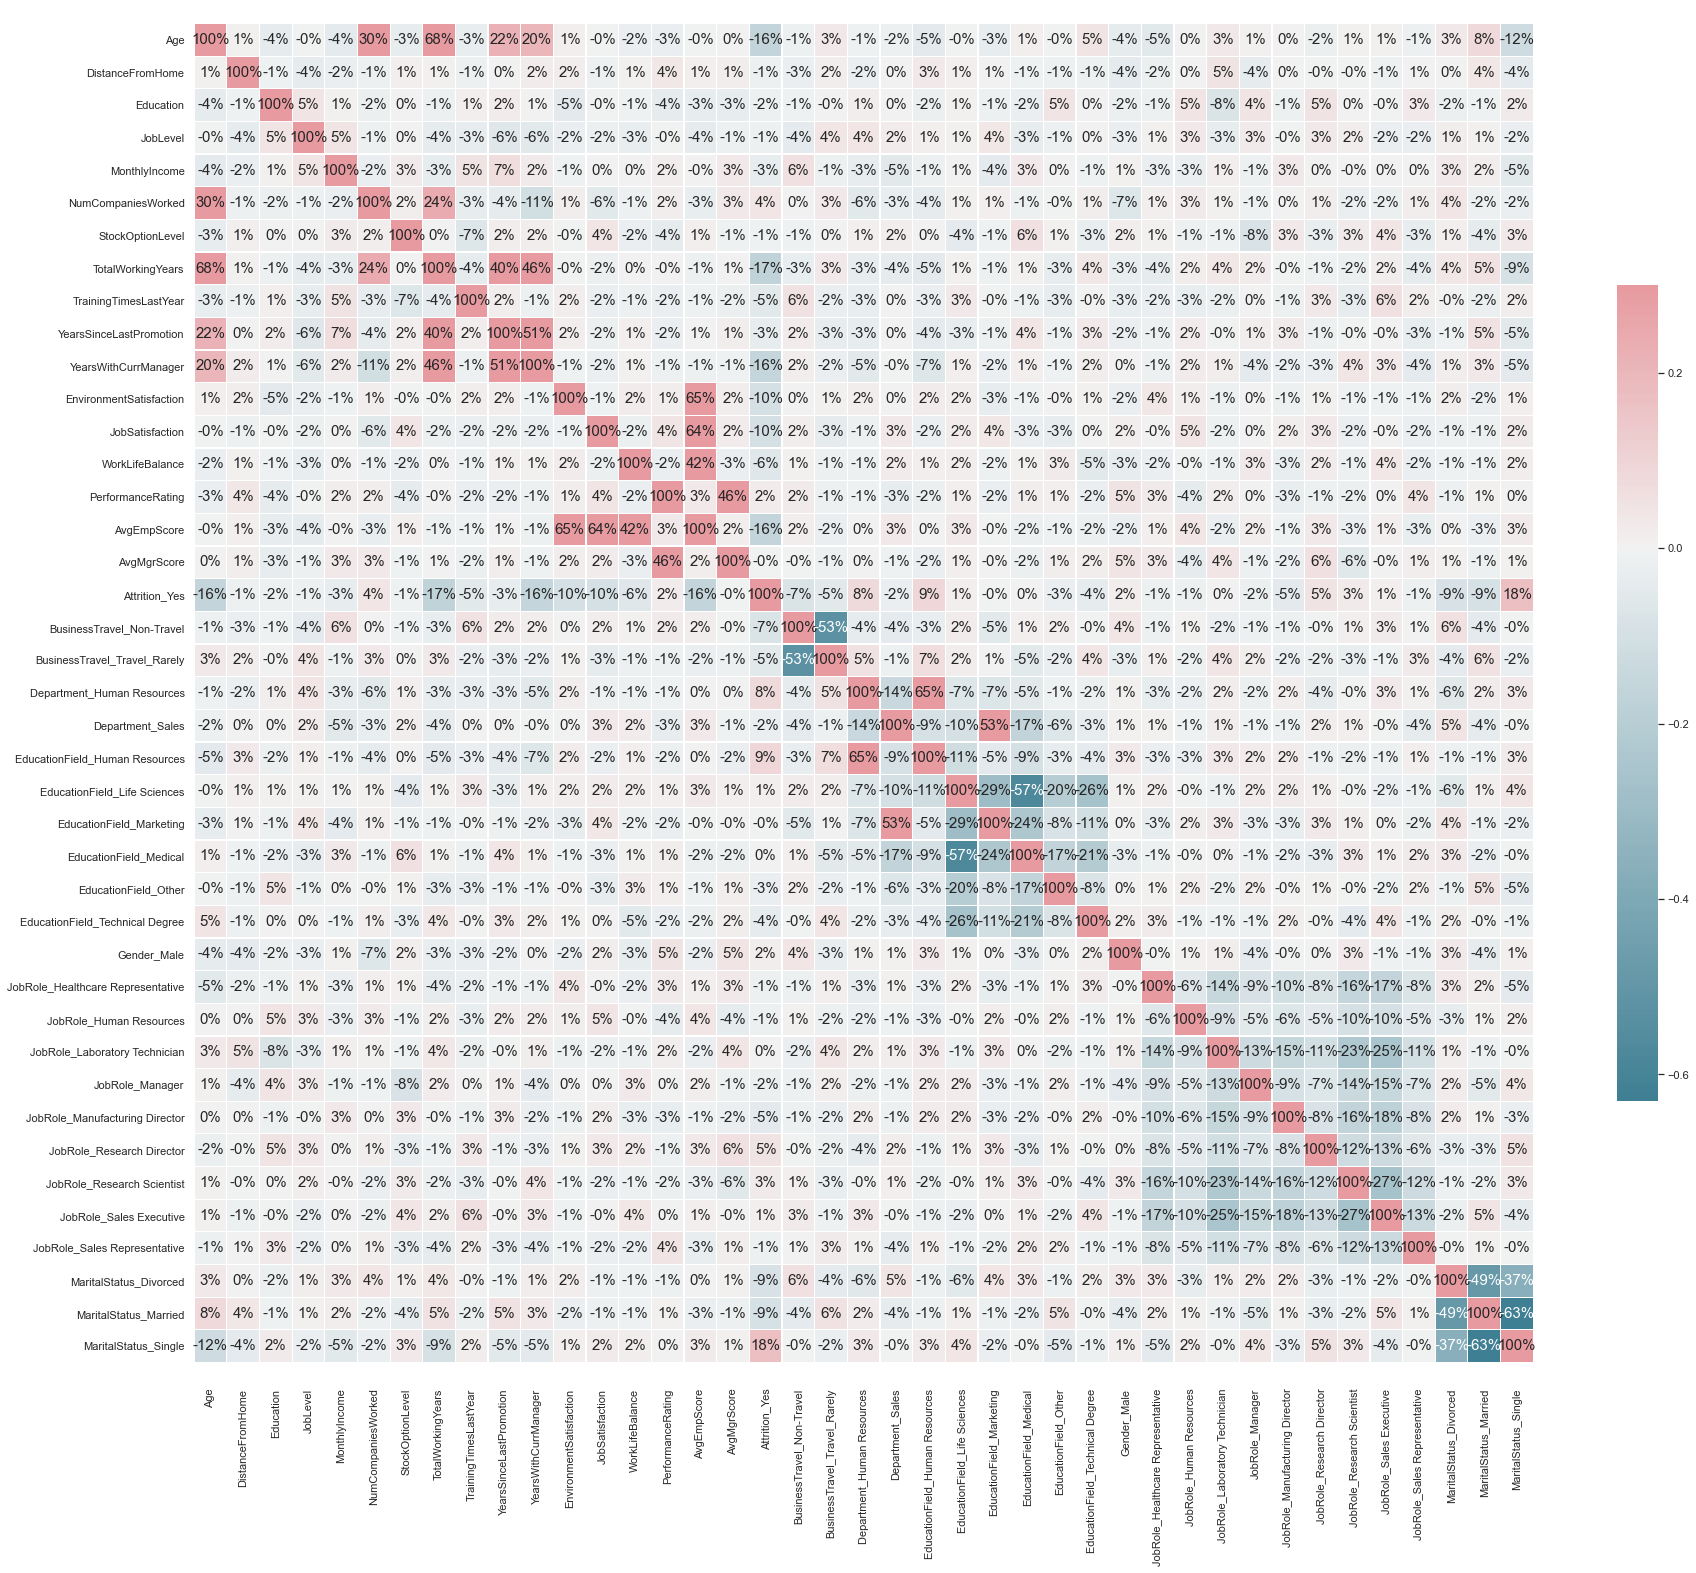

In [35]:
sns.set(style="white")
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(30, 30))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
cm = sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,annot=True, fmt=".0%", square=True, linewidths=.1, cbar_kws={"shrink": .5}, annot_kws={"size": 15})
bottom, top = cm.get_ylim()
cm.set_ylim(bottom + 0.5, top - 0.5)

sns.set_context("paper", font_scale=1.5)

plt.show()

---
<a name = Section6></a>
# 6 Logistic Regression Model
---

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4410 non-null   int64  
 1   DistanceFromHome                   4410 non-null   int64  
 2   Education                          4410 non-null   int64  
 3   JobLevel                           4410 non-null   int64  
 4   MonthlyIncome                      4410 non-null   int64  
 5   NumCompaniesWorked                 4410 non-null   float64
 6   StockOptionLevel                   4410 non-null   int64  
 7   TotalWorkingYears                  4410 non-null   float64
 8   TrainingTimesLastYear              4410 non-null   int64  
 9   YearsSinceLastPromotion            4410 non-null   int64  
 10  YearsWithCurrManager               4410 non-null   int64  
 11  EnvironmentSatisfaction            4410 non-null   float

In [37]:
X = df.drop('Attrition_Yes', axis =1)
y = df['Attrition_Yes']

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state =1)

ss = preprocessing.StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [38]:
#TimerStart
lrstart = timer()

lr = LogisticRegression(random_state=1)

lr.fit(X_train, y_train)


LogisticRegression(random_state=1)

In [39]:
y_pred_train = lr.predict(X_train)

In [40]:
y_pred_test = lr.predict(X_test)

<b>Model Performance Evaluation
    </b>

In [41]:
lraccuracy = accuracy_score(y_test, y_pred_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
lrroc_auc = auc(fpr, tpr)

lrf1_score = f1_score(y_test, y_pred_test)

lrrecall = recall_score(y_test, y_pred_test)

print('Model Accuracy: ', lraccuracy)
print('ROC_AUC Score: ', lrroc_auc)
print('F1 Score: ', lrf1_score)
print('Recall Score: ', lrrecall)

Model Accuracy:  0.8412698412698413
ROC_AUC Score:  0.5720505503465144
F1 Score:  0.2605633802816901
Recall Score:  0.16591928251121077


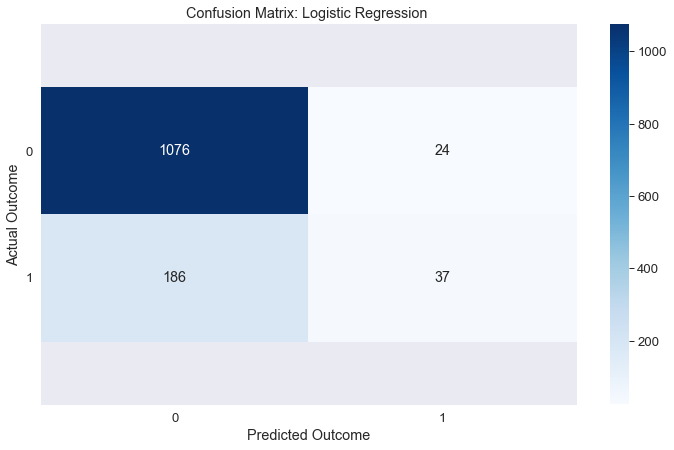

In [42]:
sns.set(context="paper", font_scale=1.5)
lrcm = confusion_matrix(y_test, y_pred_test)

ax = heatmap = sns.heatmap(lrcm, cmap="Blues", annot= True,fmt=".0f")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix: Logistic Regression ')
plt.ylabel('Actual Outcome')
plt.xlabel('Predicted Outcome')
plt.yticks(rotation=0)
plt.show()

#TimerEnd
lrtime = (timer() - lrstart)

  <b>Conclusion</b> 
  
 
While Model Accuracy is decent at 84%, F1 Score is unacceptable at 26%. We should either reject this model or optimise the hyperparameters to seek a higher F1 Score.

### Tuned Hyperparameters

<b>Performing Train-Test Split and Data Scaling required for Logistic Regression
    </b>

In [43]:
X = df.drop('Attrition_Yes', axis =1)
y = df['Attrition_Yes']

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state =1)

ss = preprocessing.StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

I will introduce 1 change to the model training by including a definition on class_weight. From the Exploratory Data Analysis, I know that the dataset is not balanced, with only 16% of the records belonging to Class 1 (our subject of interest) and 84% belonging to Class 0.

Therefore, setting a 'balanced' class_weight attempts to correct the model training to shift more weight to Class 1 relative to the default hyperparameter.

In [44]:
#TimerStart
lrtunedstart = timer()

lrtuned = LogisticRegression(random_state=1, class_weight="balanced")

lrtuned.fit(X_train, y_train)

y_pred = lrtuned.predict(X_test)

In [45]:
lrtunedaccuracy = accuracy_score(y_test, y_pred)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
lrtunedroc_auc = auc(fpr, tpr)

lrtunedf1_score = f1_score(y_test, y_pred)

lrtunedrecall = recall_score(y_test, y_pred)

print('Model Accuracy: ', lrtunedaccuracy)
print('ROC_AUC Score: ', lrtunedroc_auc)
print('F1 Score: ', lrtunedf1_score)
print('Recall Score: ', lrtunedrecall)

Model Accuracy:  0.6893424036281179
ROC_AUC Score:  0.6969873624133714
F1 Score:  0.4346629986244842
Recall Score:  0.7085201793721974


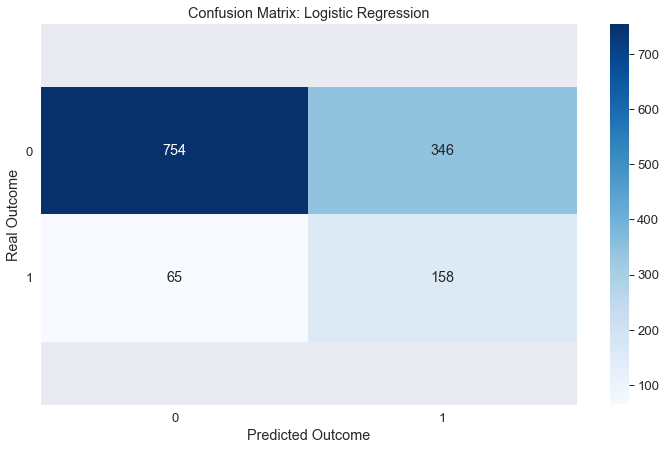

In [46]:
sns.set(context="paper", font_scale=1.5)
lrtunedcm = confusion_matrix(y_test, y_pred)

ax = heatmap = sns.heatmap(lrtunedcm, cmap="Blues", annot= True,fmt=".0f")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix: Logistic Regression')
plt.ylabel('Real Outcome')
plt.xlabel('Predicted Outcome')
plt.yticks(rotation=0)
plt.show()

#TimerEnd
lrtunedtime = (timer() - lrtunedstart)

  <b>Conclusion</b> 
  
 
Model Accuracy is dropped from 84% to 69%, but F1 Score improved significantly from 26% to 43% and Recall Score is now at 70% vs. 16% from before. This is still not good enough a model because this means that the model will be falsely predicting too many employees leaving when they did not in reality.

---
<a name = Section7></a>
# 7 Decission Tree Model
---

In [47]:
X = df.drop('Attrition_Yes', axis =1)
y = df['Attrition_Yes']

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state =0)

ss = preprocessing.StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [48]:
dtmodel = DecisionTreeClassifier(random_state= 0)
dtmodel.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [49]:
y_pred_train = dtmodel.predict(X_train)  

In [50]:
y_pred_test = dtmodel.predict(X_test)  

In [51]:
dtmodel_accuracy = accuracy_score(y_test, y_pred_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
dtmodel_auc_roc = auc(fpr, tpr)

dtmodel_f1_score = f1_score(y_test, y_pred_test)

dtmodel_recall = recall_score(y_test, y_pred_test)

print('Model Accuracy: ', dtmodel_accuracy)
print('ROC_AUC Score: ', dtmodel_auc_roc)
print('F1 Score: ', dtmodel_f1_score)
print('Recall Score: ', dtmodel_recall)

Model Accuracy:  0.9894179894179894
ROC_AUC Score:  0.9663930789707187
F1 Score:  0.9631578947368422
Recall Score:  0.9336734693877551


In [52]:
dtmodel_accuracy_train = accuracy_score(y_train, y_pred_train)

fpr, tpr, thresholds = roc_curve(y_train, y_pred_train)
dtmodel_auc_roc_train = auc(fpr, tpr)

dtmodel_f1_score_train = f1_score(y_train, y_pred_train)

dtmodel_recall_train = recall_score(y_train, y_pred_train)

print('Model Accuracy: ', dtmodel_accuracy_train)
print('ROC_AUC Score: ', dtmodel_auc_roc_train)
print('F1 Score: ', dtmodel_f1_score_train)
print('Recall Score: ', dtmodel_recall_train)

Model Accuracy:  1.0
ROC_AUC Score:  1.0
F1 Score:  1.0
Recall Score:  1.0


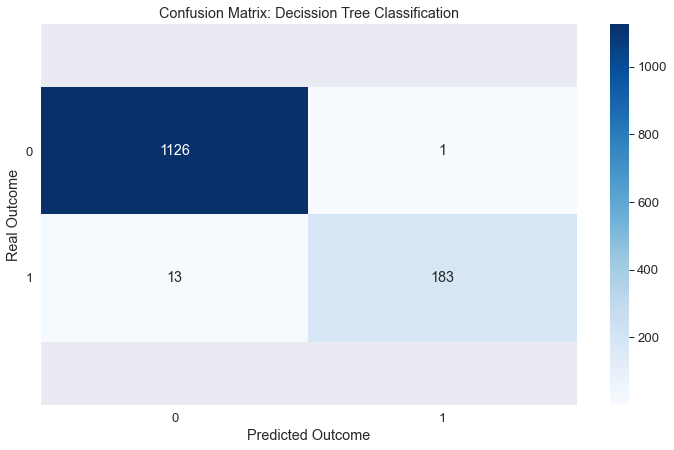

In [53]:
sns.set(context="paper", font_scale=1.5)
dtmodel_cm = confusion_matrix(y_test, y_pred_test)

ax = heatmap = sns.heatmap(dtmodel_cm, cmap="Blues", annot= True,fmt=".0f")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix: Decission Tree Classification')
plt.ylabel('Real Outcome')
plt.xlabel('Predicted Outcome')
plt.yticks(rotation=0)
plt.show()

  <b>Conclusion</b> 
  
 
Model Accuracy is increased from 69% to 98.9%, and F1 Score improved significantly from 43% to 96.3% and Recall Score is now at 93.3% vs. 70% from before. This good model to be deployed.

---
<a name = Section8></a>
# 8.Model Evaluation
---

| Model  | Algorithm  | Accuracy  | F1 Score  | Recall  |
| ------------ | ------------ | ------------ | ------------ | ------------ |
|  Model 1 | Logistic Regression  | 84.1%  | 26%  | 16.5%  |
| Model 2  | Logistic Regression (Tuned)  | 69%  | 69.6%  | 70%  |
| Model 3  | Decission Tree  | 98.94%  | 96.31%  | 93.36%  |


<a name = Section801></a>
### 8.1 Proposal to Management of Company XYZ

I would like to propose for the adoption and implementation of my <b>Decission Tree</b> model. With this model, the Management would be able to effectively predict and identify the list of employees with high attrition risk.

The adoption of my Decission Tree model with a <b>96.3%</b> F1 Score would imply the following:

1. For every <b>100</b> employees who truly want to leave the organisation, the model will be able to identify up to <b>92</b> of them on a timely basis.
2. For every <b>100</b> employees identified by the model to have high attrition risk, <b>all 100</b> of them indeed want to leave the company.
    
